#**Handwritten digits classification using neural network**




In [ ]:
import tensorflow as tf
#TensorFlow is an end-to-end open source platform for machine learning. TensorFlow is a rich system for managing all aspects of a machine learning system;
#however, this class focuses on using a particular TensorFlow API to develop and train machine learning models.
from tensorflow import keras
import matplotlib.pyplot as plt  #WE USED TO SEE HOW OUR IMAGE OF NUMBER LOOKS
#matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB
%matplotlib inline
 #tells the environment to draw the plots immediately after the current cell
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()
#The easiest way to load the data is through Keras. MNIST dataset consists of training data and testing data. Each image is stored in 28X28 and the corresponding output is the digit in the image.
#The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems.

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
len(y_train)

60000

In [ ]:
len(y_test)

10000

In [ ]:
#scaling down between 0 ans 1  to increase accuracy (by dividng by 255)
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0].shape #looking at each sample

(28, 28)

In [ ]:
x_train[0] #2D array

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

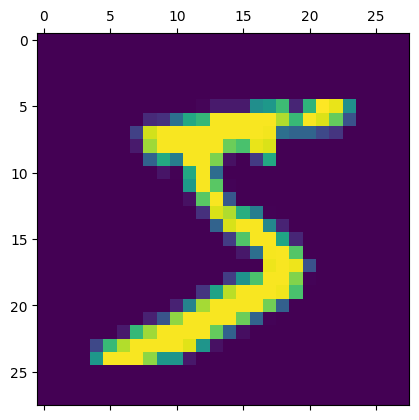

In [ ]:
plt.matshow(x_train[0]) #plotting our first train data image

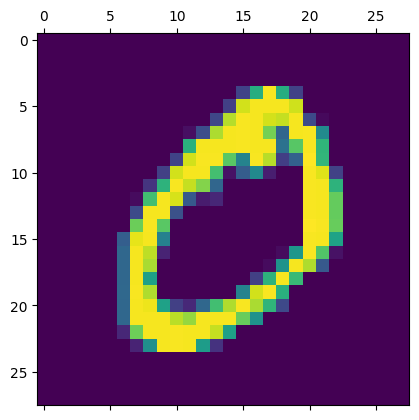

In [ ]:
plt.matshow(x_train[1])

In [ ]:
y_train[:5] # y_train contains number between 0 and 9

array([5, 0, 4, 1, 9], dtype=uint8)

FLATTENING 2D ARRAY

In [ ]:
x_train.shape #(no. of samples we have, each individual image(28,28)) and we want (6000,28*28)

(60000, 28, 28)

In [ ]:
x_train_flattened = x_train.reshape(len(x_train),28*28)  # no need to flatten y_train its an simple array

In [ ]:
print (x_train_flattened)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [ ]:
x_test_flattened.shape #1D array

(10000, 784)

In [ ]:
x_test_flattened[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

CREATING A NEURAL NETWORK - WITHOUT HIDDEN LAYER

In [ ]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')]) #sequential means I have stack of layers in my neural network thus will accept every layer as one element.


# DENSE---->All neurons in one layer are connected with every other neuron in second layer
# Dense(10--->OUTPUTSHAPE(0-9 neurons), input_shape=(784,)----->784 1D NEURONS , activation='sigmoid')

In [ ]:
# COMPILE

# Model compilation is an activity performed after writing the statements in a model and before training starts. It checks for format errors, and defines the loss function, the optimizer or learning rate, and the metrics
# optimizers allow you to train efficiently
# loss = sparse_categorical_crossentropy --->output is categorical: 0-9
                                       #--->sparse: output variable i.e y_train is an interger
#accuracy--->we want an accurate model


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#TRAINING


model.fit(x_train_flattened, y_train, epochs=5)

#EPOCHS=refers to the one entire passing of training data through the algorithm,ONE ITERATION

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 2.1880 - accuracy: 0.5968
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9772 - accuracy: 0.7100
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7906 - accuracy: 0.7385
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6267 - accuracy: 0.7607
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4839 - accuracy: 0.7751


In [ ]:
#EVALUATE ACCURACY ON TEST DATA SET
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4042 - accuracy: 0.8034


[1.4042389392852783, 0.8033999800682068]

313/313 [==============================] - 0s 1ms/step


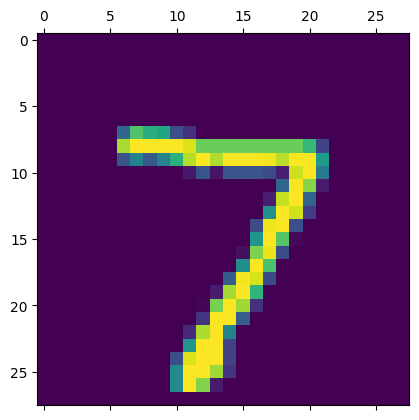

In [ ]:
#PRIDICTING
plt.matshow(x_test[0])

y_pridicted= model.predict(x_test_flattened) #predicting for all, first value should be 7


In [ ]:
y_pridicted[0] #this gives all the values 0-9 now we need to find the max value

array([0.31694385, 0.4000171 , 0.349664  , 0.41078883, 0.47440952,
       0.3823196 , 0.28795782, 0.80724937, 0.37706152, 0.57736546],
      dtype=float32)

In [ ]:
np.argmax(y_pridicted[0]) #used numpy to find the max value




7

In [ ]:
# for confusion matrix lets create a list of y_predictions using np.argmax
y_pridicted_labels=[np.argmax(i) for i in y_pridicted]
print(y_pridicted_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 4, 7, 0, 6, 9, 0, 1, 3, 9, 7, 3, 4, 7, 6, 4, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 1, 1, 1, 7, 4, 1, 3, 3, 3, 2, 4, 4, 6, 3, 5, 3, 2, 0, 4, 1, 9, 1, 7, 8, 9, 2, 7, 9, 6, 4, 3, 0, 7, 0, 2, 8, 1, 7, 3, 7, 1, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 1, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 4, 9, 2, 1, 9, 4, 8, 1, 3, 9, 7, 9, 4, 4, 9, 7, 3, 6, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 3, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 1, 9, 4, 5, 3, 1, 5, 6, 0, 3, 1, 4, 6, 5, 4, 6, 3, 4, 1, 1, 9, 4, 7, 3, 3, 2, 1, 1, 8, 1, 8, 1, 8, 5, 0, 3, 9, 2, 3, 0, 1, 1, 1, 0, 4, 0, 1, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 3, 2, 9, 4, 7, 9, 1, 9, 0, 3, 5, 7, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 1, 8, 7, 7, 9, 2, 2, 4, 1, 3, 3, 8, 7, 1, 6, 0, 6, 4, 1, 9, 1, 9, 5, 7, 7, 1, 1, 2, 0, 8, 1, 7, 7, 9, 1, 8, 1, 3, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 1, 7, 9, 2, 6, 4, 1, 3, 4, 2, 9, 2, 0, 9, 0, 0, 2, 8, 1, 7, 1, 2, 9, 0, 2, 9, 4, 3, 3, 0, 0, 3, 1, 9, 1, 1, 3, 3, 1, 1, 9, 3, 6, 7, 2, 0, 7, 1, 1, 1, 1, 

BUILDING CONFUSION MATRIX

In [ ]:
# we will use tensorflow to create confusion matrix

cm = tf.math.confusion_matrix(labels=y_test,predictions= y_pridicted_labels)
#we cant give y_pridicted values as it is, we need to give the predictions and not sigmoid function values.
print(cm)

tf.Tensor(
[[ 926    2    5    8    0    3   29    1    6    0]
 [   0 1108    5    4    0    0    4    0   14    0]
 [  20   88  777   33   16    0   35   22   40    1]
 [   6   49   27  861    1    2    5   24   28    7]
 [   2   51    2    0  791    0   31    9    4   92]
 [  38  112    4  201   30  388   27   41   28   23]
 [  26   47    6    0   14   10  854    0    1    0]
 [   2   70   12    2    9    0    3  903    7   20]
 [  22   91    7   90   14    5   17   26  684   18]
 [  23   44    5   10   75    0    1  100    9  742]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

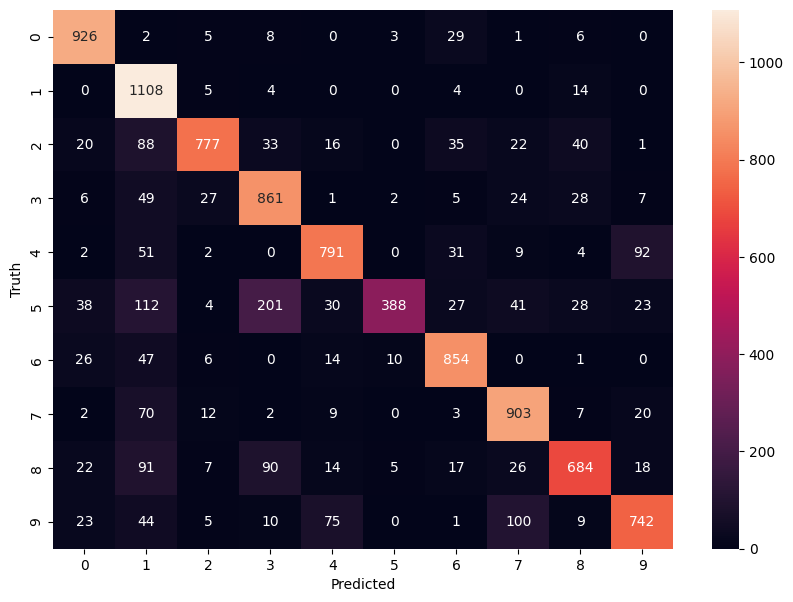

In [ ]:
#showing the confusin matrix in a fancy way using seaborn
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# anything thats not in the diagnoal or highlighted value of the diagonal is a ERROR

CREATING A NEURAL NETWORK - WITH HIDDEN LAYER

In [ ]:
#hidden layer improves performance
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2085 - accuracy: 0.7118
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5040 - accuracy: 0.8712
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3900 - accuracy: 0.8942
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3465 - accuracy: 0.9032
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3227 - accuracy: 0.9088


In [ ]:
#evaluate the performance
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3035 - accuracy: 0.9134


[0.3034971058368683, 0.9133999943733215]

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

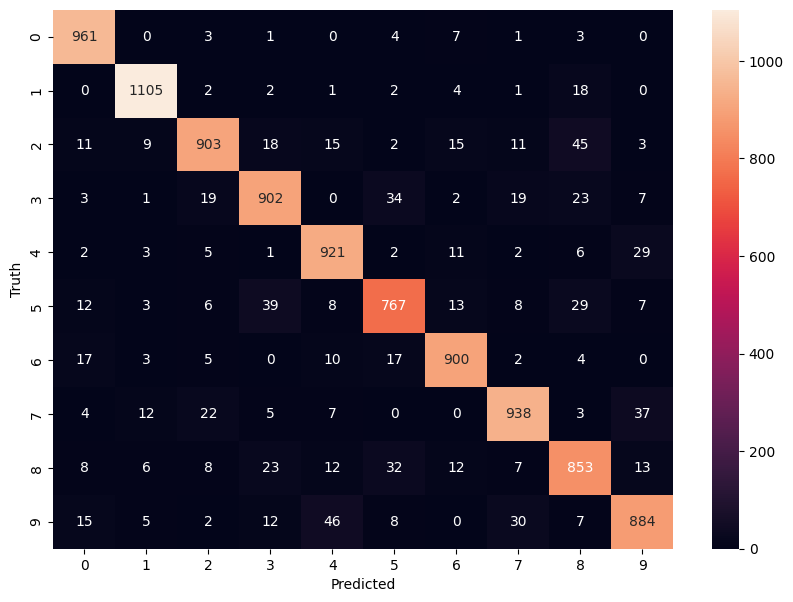

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')